In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather

#move up in directory
os.chdir('../')
# os.getcwd()

In [2]:
from helpers import dot2_

In [3]:
path_to_test_runs = 'data/rnn_raw_data/'

In [9]:
# CONFIG
NUM_IDS = 20
NUM_RUNS = 10
TEST_SDS = np.arange(0.02, 0.32, 0.02)

In [27]:
def get_accuracy_by_id_sd(test_sd_range, num_runs, num_ids, file_string, label):   
    i = 0
    # convert float to str
    for id_ in range(1,NUM_IDS):
            for sd in TEST_SDS:
                            
                test_sd = dot2_(sd)
                
                if i == 0:
                
                    
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(id_, test_sd), 'rb'))                
#                     all_means_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','test_sd']).accuracy.mean()
#                     all_means_by_id_sd = all_means_by_id_sd.groupby(['rnn_id','test_sd']).median()

# uncomment if mean rank is needed
                    # calculate rank for row
                    ranks = all_test_runs[['p_rew_1', 'p_rew_2', 'p_rew_3', 'p_rew_4']].rank(axis=1, ascending=False)
                    # get chosen rank 
                    ch_rank = [[r1, r2, r3, r4][ch] for ch, r1, r2, r3, r4 in zip(all_test_runs['choice'], ranks['p_rew_1'], ranks['p_rew_2'], ranks['p_rew_3'], ranks['p_rew_4'])]
                    # append chosen rank to df
                    all_test_runs['chosen_rank'] = ch_rank
                    all_means_by_id_sd = all_test_runs.groupby(['rnn_id','test_sd']).chosen_rank.mean()
                        
                        

# uncomment if median sum of rewards is needed
#                     all_means_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','test_sd']).reward.sum().groupby(['rnn_id','test_sd']).median()
                else:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(id_, test_sd), 'rb'))

                    
                  # calculate rank for row
                    ranks = all_test_runs[['p_rew_1', 'p_rew_2', 'p_rew_3', 'p_rew_4']].rank(axis=1, ascending=False)
                  # get chosen rank 
                    ch_rank = [[r1, r2, r3, r4][ch] for ch, r1, r2, r3, r4 in zip(all_test_runs['choice'], ranks['p_rew_1'], ranks['p_rew_2'], ranks['p_rew_3'], ranks['p_rew_4'])]
                  # append chosen rank to df
                    all_test_runs['chosen_rank'] = ch_rank
                    means_by_id_sd = all_test_runs.groupby(['rnn_id','test_sd']).chosen_rank.mean()

# uncomment if median sum of rewards is needed
#                   means_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','test_sd']).reward.sum().groupby(['rnn_id','test_sd']).median()
          
#                     means_by_id_sd = all_test_runs.groupby(['rnn_id', 'run', 'test_sd']).accuracy.mean()
#                     means_by_id_sd = means_by_id_sd.groupby(['rnn_id', 'test_sd']).median()
            
                    all_means_by_id_sd = pd.concat([all_means_by_id_sd, means_by_id_sd])
                
                i += 1
                
    df = all_means_by_id_sd.reset_index(level='test_sd').round({'test_sd': 2})  
    df['train_sd'] =  df.shape[0] * [label]
                
    return(df)

In [15]:
# get number of switches per run and instance for one sd

def get_medians_switches_by_id_sd(test_sd_range, num_runs, num_ids, file_string, label):   
    i = 0
    for id_ in range(1,NUM_IDS):
            for sd in TEST_SDS:
                            
                test_sd = dot2_(sd)

                if i == 0:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(id_, test_sd), 'rb'))                
                    is_switch = [int(all_test_runs.choice[t] != all_test_runs.choice[t-1]) for t in range(1, len(all_test_runs.choice))]
                    is_switch = np.append(0, is_switch)
                    all_test_runs['is_switch'] = is_switch                    
                    all_median_switches_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','test_sd']).is_switch.mean()
                    all_median_switches_by_id_sd = all_median_switches_by_id_sd.groupby(['rnn_id','test_sd']).median()

                else:
                    all_test_runs = pickle.load(open(path_to_test_runs + file_string.format(id_, test_sd), 'rb'))
                    is_switch = [int(all_test_runs.choice[t] != all_test_runs.choice[t-1]) for t in range(1, len(all_test_runs.choice))]
                    is_switch = np.append(0, is_switch)
                    all_test_runs['is_switch'] = is_switch
                    median_switches_by_id_sd = all_test_runs.groupby(['rnn_id', 'run','test_sd']).is_switch.mean()
                    median_switches_by_id_sd = median_switches_by_id_sd.groupby(['rnn_id', 'test_sd']).median()
                    all_median_switches_by_id_sd = pd.concat([all_median_switches_by_id_sd, median_switches_by_id_sd])
                i += 1
                
    df = all_median_switches_by_id_sd.reset_index(level='test_sd').round({'test_sd': 2})  
    df['train_sd'] =  df.shape[0] * [label]
                
    return(df)

# Continuous Rewards

In [28]:
# file_strings = ['rnn_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_05_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
#                'rnn_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
#                'rnn_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_meta_volatility_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
#                'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_meta_volatility_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
#                'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
#                'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
#                'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}']

# labels = ['RNN: Low Volatility',
#           'RNN: Medium Volatility',
#           'RNN: Meta-Volatility', 
#           'LSTM + A2C: Meta-Volatility',
#           'LSTM + A2C: Medium Volatility',
#           'LSTM + A2C + EW .05: Medium Volatility',
#           'LSTM + A2C + EW linear: Medium Volatility']

file_strings = ['lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}',
               'lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_res_p_{}']


labels = ['LSTM + A2C + EW .05: Medium Volatility',
          'LSTM + A2C + EW linear: Medium Volatility']

df_list = []

for i, file in enumerate(file_strings):
    
    df_list.append(get_accuracy_by_id_sd(test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , file_string = file
                   , label = labels[i]))

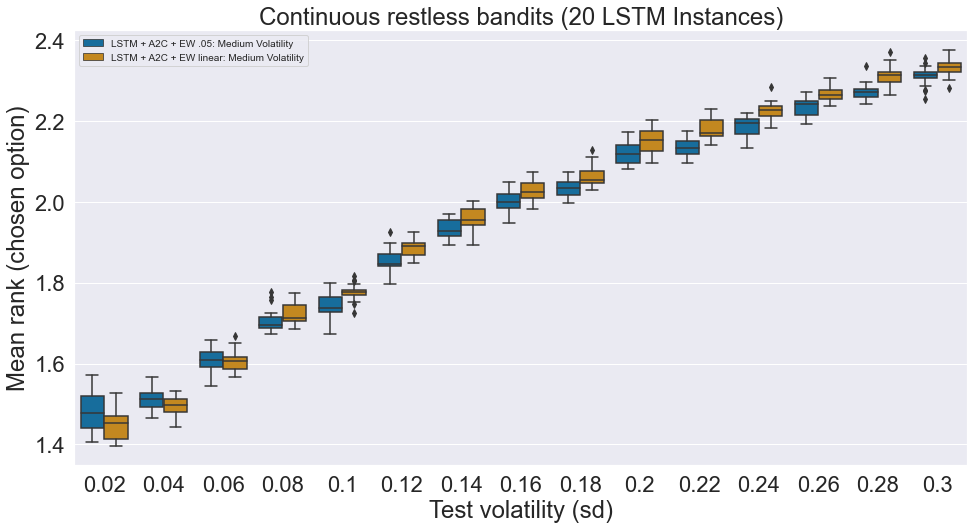

In [29]:
#combine dfs in df list
cont_plot_data = pd.concat(df_list)

# plot boxplot
plt.figure(figsize=(16, 8))

sns.set(font_scale=2)

box = sns.boxplot(x = 'test_sd', y = 'chosen_rank', hue = 'train_sd', data=cont_plot_data, 
                 palette="colorblind", hue_order= labels)

# box.axhline(1/4, ls = '--', c = 'black')

box.set(
    xlabel='Test volatility (sd)', 
    ylabel='Mean rank (chosen option)')

box.set_title('Continuous restless bandits (20 LSTM Instances)')

legend = box.legend()

plt.legend(loc=2, prop={'size': 10})


x_ticks = []
for i in TEST_SDS: x_ticks.append(str(round(i, 2)))
box.set_xticklabels(x_ticks)            

plt.show()

## Number of switches


In [20]:
df_list = []

for i, file in enumerate(file_strings):
    
    df_list.append(get_medians_switches_by_id_sd(test_sd_range = TEST_SDS
                   , num_runs = NUM_RUNS
                   , num_ids = NUM_IDS
                   , file_string = file
                   , label = labels[i]))

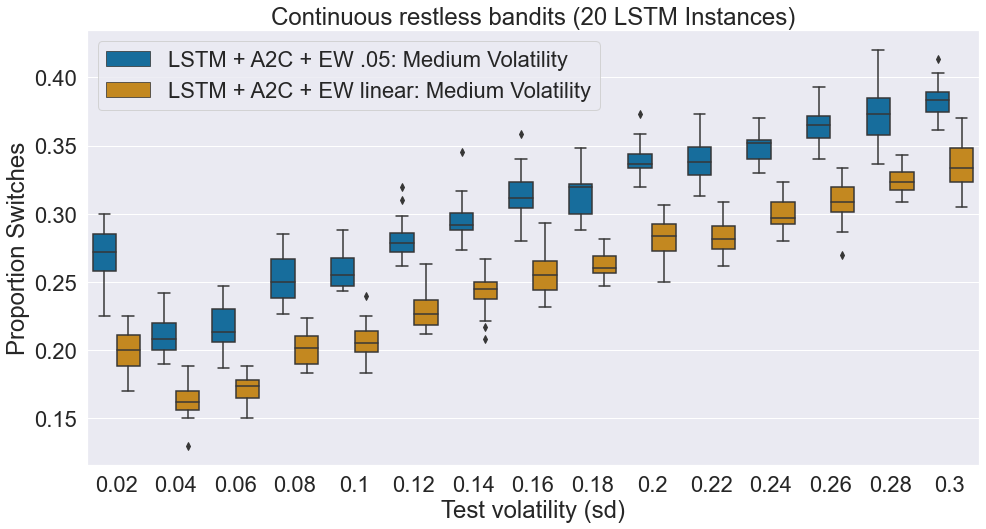

In [24]:
#combine dfs in df list
cont_switch_plot_data = pd.concat(df_list)

# plot boxplot
plt.figure(figsize=(16, 8))

sns.set(font_scale=2)

box = sns.boxplot(x = 'test_sd', y = 'is_switch', hue = 'train_sd', data=cont_switch_plot_data, 
                 palette="colorblind", hue_order= labels)

# box.axhline(1/4, ls = '--', c = 'black')

# box.set_title('continuous restless bandits')

legend = box.legend()

box.set(
    xlabel='Test volatility (sd)', 
    ylabel='Proportion Switches')

box.set_title('Continuous restless bandits (20 LSTM Instances)')

x_ticks = []
for i in TEST_SDS: x_ticks.append(str(round(i, 2)))
box.set_xticklabels(x_ticks) 

plt.show()


# ML Curve-Fitting

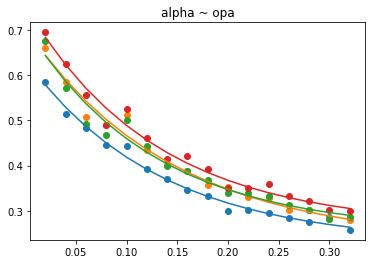

In [51]:
from scipy.optimize import curve_fit

# cont_plot_data = cont_plot_data.groupby(['rnn_test_sd', 'train_sd']).median().reset_index()
# cont_switch_plot_data = cont_switch_plot_data.groupby(['rnn_test_sd', 'train_sd']).median().reset_index()

# one-phase associative function
def opa_fct(x, y0, y_max, k):
    return y0 + (y_max-y0)*(1-np.exp(-k*x))

# def fit_fct(x,y, fct):
#     return(curve_fit(f=fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf)))

# for i in ['.05', '.1', 'meta_volatility', 'aac_meta_vol.']:

    x = np.arange(0.02, 0.34, 0.02)
    y = cont_plot_data[cont_plot_data.train_sd == i].accuracy

    # one-phase associative function
    alpha_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.1], bounds=(-np.inf, np.inf))
    
#     y_predicted_alpha_opa = opa_fct(x, *alpha_opa_pars)
    
#     plt.scatter(x,y)
#     plt.plot(x,  y_predicted_alpha_opa, '-')
#     plt.title('accuracy ~ opa')    

# plt.show()

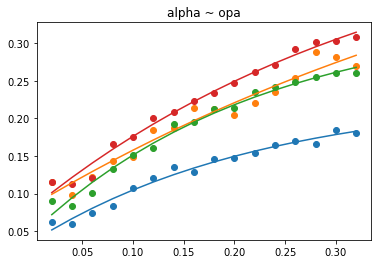

In [52]:
# for i in ['.05', '.1', 'meta_volatility',  'aac_meta_vol.']:

#     x = np.arange(0.02, 0.34, 0.02)
#     y = cont_switch_plot_data[cont_switch_plot_data.train_sd == i].is_switch

#     # one-phase associative function
#     alpha_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.1], bounds=(-np.inf, np.inf))
    
#     y_predicted_alpha_opa = opa_fct(x, *alpha_opa_pars)
    
#     plt.scatter(x,y)
#     plt.plot(x,  y_predicted_alpha_opa, '-')
#     plt.title('switches ~ opa')    

# plt.show()

# Bayesian Curve-Fitting

In [58]:
# # export median values

# fit_path = 'data/intermediate_data/modeling/modeling_fits/'

# feather.write_feather(cont_plot_data, fit_path + '/' + 'accuracy_test.feather')
# feather.write_feather(cont_switch_plot_data, fit_path + '/' + 'switch_test.feather')

# Binary Rewards

In [ ]:
# median_acc_05 = get_accuracy_by_id_sd(train_sd = '.05'
#                    , test_sd_range = TEST_SDS
#                    , num_runs = NUM_RUNS
#                    , num_ids = NUM_IDS
#                    , reward_type = 'binary')

# median_acc_1 = get_accuracy_by_id_sd(train_sd = '.1'
#                    , test_sd_range = TEST_SDS
#                    , num_runs = NUM_RUNS
#                    , num_ids = NUM_IDS
#                    , reward_type = 'binary')

# median_acc_meta = get_accuracy_by_id_sd(train_sd = 'meta_volatility'
#                    , test_sd_range = TEST_SDS
#                    , num_runs = NUM_RUNS
#                    , num_ids = NUM_IDS
#                    , reward_type = 'binary')

In [ ]:
# df1 = mean_acc_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
# df2 = mean_acc_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
# df3 = mean_acc_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

# # create hue variables
# df1['train_sd'] =  mean_acc_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
# df2['train_sd'] =  mean_acc_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
# df3['train_sd'] =  mean_acc_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']


# binary_plot_data = pd.concat([df1, df2, df3])

In [ ]:
# plot boxplot
# plt.figure(figsize=(15, 5))

# box = sns.boxplot(x = 'rnn_test_sd', y = 'accuracy', hue = 'train_sd', data=binary_plot_data, 
#                  palette="colorblind")

# box.axhline(1/4, ls = '--', c = 'black')

# box.set(
#     xlabel='test sd', 
#     ylabel='accuracy')

# box.set_title('binary restless bandits')

# x_ticks = []
# for i in TEST_SDS: x_ticks.append(dot2_(i))
# box.set_xticklabels(x_ticks)            

# plt.show()

In [ ]:
# mean_switches_05 = get_mean_switches_by_id_sd(train_sd = '.05'
#                    , test_sd_range = TEST_SDS
#                    , num_runs = NUM_RUNS
#                    , num_ids = NUM_IDS
#                    , reward_type = 'binary')

# mean_switches_1 = get_mean_switches_by_id_sd(train_sd = '.1'
#                    , test_sd_range = TEST_SDS
#                    , num_runs = NUM_RUNS
#                    , num_ids = NUM_IDS
#                    , reward_type = 'binary')

# mean_switches_meta = get_mean_switches_by_id_sd(train_sd = 'meta_volatility'
#                    , test_sd_range = TEST_SDS
#                    , num_runs = NUM_RUNS
#                    , num_ids = NUM_IDS
#                    , reward_type = 'binary')

In [ ]:
# df1 = mean_switches_meta.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
# df2 = mean_switches_1.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})
# df3 = mean_switches_05.reset_index(level='rnn_test_sd').round({'rnn_test_sd': 2})

# # create hue variables
# df1['train_sd'] =  mean_switches_meta.reset_index(level='rnn_test_sd').shape[0] * ['meta_volatility']
# df2['train_sd'] =  mean_switches_1.reset_index(level='rnn_test_sd').shape[0] * ['.1']
# df3['train_sd'] =  mean_switches_05.reset_index(level='rnn_test_sd').shape[0] * ['.05']


# binary_switch_plot_data = pd.concat([df1, df2, df3])

In [ ]:
# # plot boxplot
# plt.figure(figsize=(16, 8))

# box = sns.boxplot(x = 'rnn_test_sd', y = 'is_switch', hue = 'train_sd', data=binary_switch_plot_data, 
#                  palette="colorblind")

# # box.axhline(1/4, ls = '--', c = 'black')

# box.set(
#     xlabel='test sd', 
#     ylabel='switches')

# box.set_title('binary restless bandits')

# x_ticks = []
# for i in TEST_SDS: x_ticks.append(dot2_(i))
# box.set_xticklabels(x_ticks)            

# plt.show()